In [15]:
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import pickle
import h5py
import cv2

## **Getting file path and unzipping the files**


In [16]:
zippath = os.getcwd()
dataset_path = os.path.join(zippath, 'dataset')
if not os.path.exists(os.path.join(dataset_path, 'images')):
    os.mkdir(os.path.join(dataset_path, 'images'))
for file in os.listdir(dataset_path):
    if file.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(dataset_path, file)) as zf:
            zf.extractall(os.path.join(dataset_path, 'images'))            

## **Data prep**


In [17]:
labels = []
border = []
target_path = os.path.join(dataset_path, 'images')
print(target_path)

c:\Users\admin\OneDrive - Amity University\Desktop\Programming\Python\brain-tumor-analysis\dataset\images


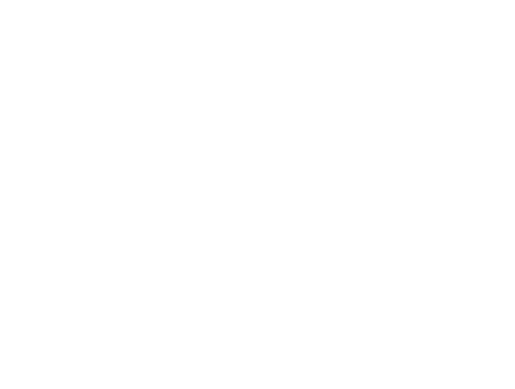

In [18]:
if not os.path.exists(os.path.join(dataset_path, 'converted')):
    os.mkdir(os.path.join(dataset_path, 'converted'))
for filename in os.listdir(os.path.join(dataset_path, 'images')):
    with h5py.File(os.path.join(dataset_path, 'images', filename), 'r') as f:
        img = f['cjdata']['image']
        label = f['cjdata']['label'][0][0]
        labels.append(int(label))
        
        img = np.array(img, dtype=np.float32)
        plt.axis('off')
        plt.imsave(os.path.join(dataset_path, 'converted' , filename.split('.')[0]+".jpg"), img, cmap='gray')


In [19]:
'''
Converting lists to numpy arrays
'''

numpy_labels = np.array(labels, dtype=np.int64)
numpy_labels.shape

(3064,)

In [20]:
"""
    Storing labels gathered into a pickle file for future
     use in the model when training the model.
 """
if not os.path.exists('picklefiles'):
    os.mkdir('picklefiles')
pickle_outf = open('picklefiles/labels.pickle', "wb")
pickle.dump(numpy_labels, pickle_outf)
pickle_outf.close()

In [21]:
training_array = []
img = None
label = None

In [28]:
cv_target = os.path.join(dataset_path, 'converted')
i = 0
for filename in os.listdir(os.path.join(dataset_path, 'converted')):

    img = cv2.imread(os.path.join(cv_target, filename), cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, (512,512))
    label = numpy_labels
    training_array.append([img, label])
    i += 1
print(f'Label: {label}')
print(f'shape: {img.shape}')
print(f'number of images = {i}')
if not os.path.exists('picklefiles'):
    os.mkdir('picklefiles')
training_pickle = open('picklefiles/training.pickle', "wb")
pickle.dump(training_array, training_pickle)
training_pickle.close()

Label: [1 1 1 ... 3 3 3]
shape: (512, 512, 3)
i = 3064
